# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
# import signnames.csv. Map y values to its sign name.
import pandas as pd
signnames = pd.read_csv("signnames.csv")
# to get the sign name of the corresponding index:
# signnames["SignName"][index]
signnames_list = [signnames["SignName"][index] for index in range(43)]

Text(0.5,1,'End of speed limit (80km/h)')

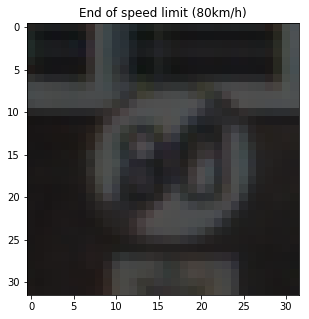

In [4]:
# Data exploration visualization code goes here.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Randomly choose an image from the trainging set, show the image and its meaning.
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title(signnames["SignName"][y_train[index]])

Maximum count:  2010
Minimum count:  180


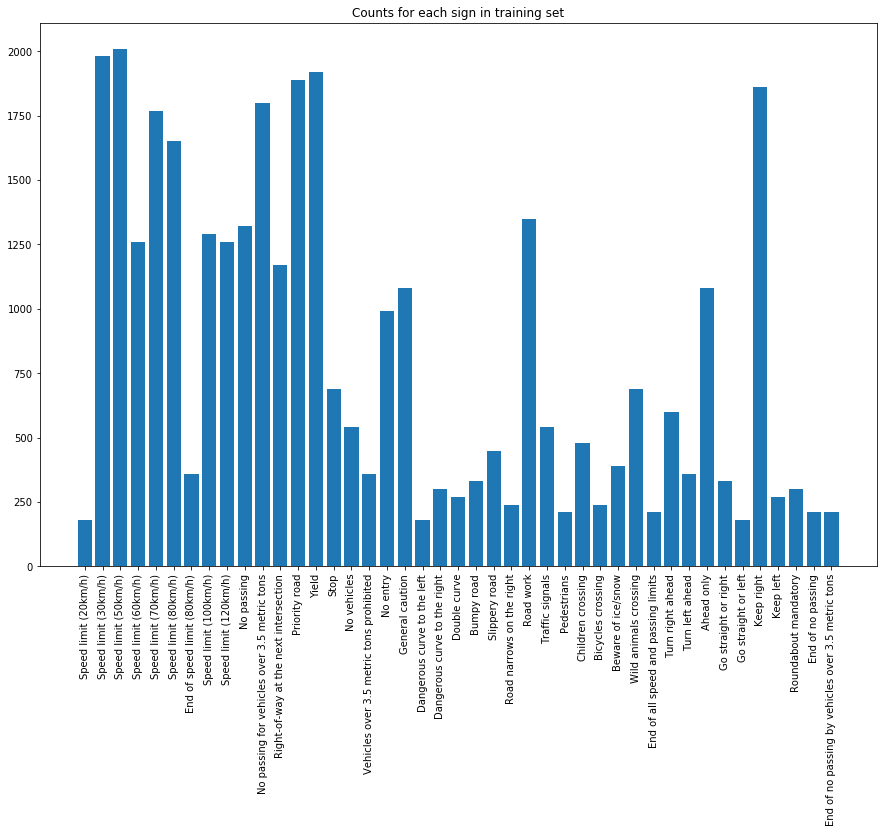

In [5]:
"""Explore the training set. Find out the max and min class. 
   Plot every class with its count."""
df = pd.DataFrame(y_train)
grouped = df.groupby(df[0])
grouped.size()
print("Maximum count: ", max(grouped.size()))
print("Minimum count: ", min(grouped.size()))
plt.figure(2, figsize=(15,10))
plt.bar([index for index in range(43)], grouped.size())
plt.xticks([index for index in range(43)],signnames_list, rotation='vertical')
plt.title("Counts for each sign in training set")
plt.savefig("./examples/visualization.jpg")

#### Note:
From the statistical result and this histogram, we find out this dataset is unbalenced. So the model may tend to predict a sign as one of the large classes. I will weigh classes based on this count.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Setup tensorflow

In [6]:
import tensorflow as tf

BATCH_SIZE = 256

/home/nqiao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
# Shuffle the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [8]:
# Grayscale all the datasets with tf.image.rgb_to_grayscale().
X_train_gray = tf.image.rgb_to_grayscale(X_train)
X_valid_gray = tf.image.rgb_to_grayscale(X_valid)
X_test_gray = tf.image.rgb_to_grayscale(X_test)

In [9]:
# Normalize all three datasets.
X_train_nor = X_train / 128 - 1
X_valid_nor = X_valid / 128 - 1
X_test_nor = X_test / 128 - 1
print("normalized X_train shape: ", X_train_nor.shape)

normalized X_train shape:  (34799, 32, 32, 3)


### Model Architecture
**layer 1: ** Convolutional(5\*5\*6) --> relu --> max pooling   
**layer 2: ** Convolutional(5\*5\*16) --> relu --> max pooling --> flatten  
**layer 3: ** Fully Connected(120) --> relu  
**layer 3: ** Fully Connected(84) --> relu  
**layer 3: ** Fully Connected(43) --> logits  

In [10]:
from tensorflow.contrib.layers import flatten

# Change the architecture slightly if using gray scale images.
GRAY = 1
RGB = 3

# The filter size is changed to 3x3. The other parts of architecture keep the same.
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Convolutional. Input = 32x32x3. Output  30x30x6
    # Change this RGB to GRAY if gray scale are applied.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, RGB, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output =  15x15x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 13x13x6
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 6x6x16 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 36*16. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(36*16, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
#     fc1 = tf.nn.dropout(fc1, 0.75)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
#     fc2 = tf.nn.dropout(fc2, 0.75)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [11]:
# The original LeNet
def LeNet_0(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
#     fc1 = tf.nn.dropout(fc1, 0.75)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
#     fc2 = tf.nn.dropout(fc2, 0.75)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [12]:
# Set placeholders for inputs
# Change this RGB to GRAY if gray scale is applied.
x = tf.placeholder(tf.float32, (None, 32, 32, RGB))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43) 

# Weigh all the classes based on times shown in training set. 
# small number classes are more important, large number classes are less important.
class_weights = np.ones(43) / np.array(grouped.size()) * grouped.size().sum()
print(class_weights)

[193.32777778  17.57525253  17.31293532  27.61825397  19.66045198
  21.09030303  96.66388889  26.97596899  27.61825397  26.36287879
  19.33277778  29.74273504  18.41216931  18.12447917  50.43333333
  64.44259259  96.66388889  35.15050505  32.2212963  193.32777778
 115.99666667 128.88518519 105.45151515  77.33111111 144.99583333
  25.77703704  64.44259259 165.70952381  72.49791667 144.99583333
  89.22820513  50.43333333 165.70952381  58.0951586   96.66388889
  32.2212963  105.45151515 193.32777778  18.70913978 128.88518519
 115.99666667 165.70952381 165.70952381]


### Training Pipeline

In [13]:
rate = 0.001

# logits: the score of a data point
# LeNet 3x3; LeNet_0 5x5
logits = LeNet_0(x)
# the distance between score and the ground truth
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

weighted_cross_entropy=tf.nn.weighted_cross_entropy_with_logits(targets=one_hot_y, logits=logits, pos_weight=class_weights)

# average of all data points in training set
# change the cross entropy to weighted version
loss_operation = tf.reduce_mean(weighted_cross_entropy)
# our goal is to min this average
optimizer = tf.train.AdamOptimizer(learning_rate = rate)  # ADAM
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [14]:
# tf.argmax: Returns the index with the largest value across axis of a tensor.
# this step is to compare the prediction and the ground truth. E.g.: (1,1,0,1,1,0)--err:2/6
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    # tf.get_default_session(): Returns the default session for the current thread.
    # function evaluate() is called right after the training session.
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # accuracy for this particular batch
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
# Choose input dataset. 
# Options are original(X_train), normalized(X_train_nor), grayscale(X_train_gray).
X_train_input = X_train_nor
X_valid_input = X_valid_nor
X_test_input  = X_test_nor
print(X_train_input.shape, y_train.shape)

(34799, 32, 32, 3) (34799,)


In [16]:
# Model name: this name will be the save file name.
MODEL_NAME = "100epoch_dropout0.75"
EPOCHS = 70

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    # create a "logs" dir which will contain information for tensorboard
#     writer = tf.summary.FileWriter("logs", sess.graph)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # change different X_train input
        X_train_input, y_train = shuffle(X_train_input, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_input[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        # change different X_valid input
        train_accuracy = evaluate(X_train_input, y_train)
        validation_accuracy = evaluate(X_valid_input, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trained_models/' + MODEL_NAME)
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.583
Validation Accuracy = 0.501

EPOCH 2 ...
Training Accuracy = 0.790
Validation Accuracy = 0.689

EPOCH 3 ...
Training Accuracy = 0.829
Validation Accuracy = 0.729

EPOCH 4 ...
Training Accuracy = 0.887
Validation Accuracy = 0.792

EPOCH 5 ...
Training Accuracy = 0.917
Validation Accuracy = 0.819

EPOCH 6 ...
Training Accuracy = 0.933
Validation Accuracy = 0.834

EPOCH 7 ...
Training Accuracy = 0.948
Validation Accuracy = 0.854

EPOCH 8 ...
Training Accuracy = 0.961
Validation Accuracy = 0.857

EPOCH 9 ...
Training Accuracy = 0.963
Validation Accuracy = 0.873

EPOCH 10 ...
Training Accuracy = 0.962
Validation Accuracy = 0.875

EPOCH 11 ...
Training Accuracy = 0.977
Validation Accuracy = 0.893

EPOCH 12 ...
Training Accuracy = 0.978
Validation Accuracy = 0.890

EPOCH 13 ...
Training Accuracy = 0.983
Validation Accuracy = 0.888

EPOCH 14 ...
Training Accuracy = 0.985
Validation Accuracy = 0.890

EPOCH 15 ...
Training Accuracy = 0.988
Valid

#### Training logs:
  
nor, 100epoch, no drop out, 3x3: 91%  
nor, 70epoch, dopout 0.75, 5x5: 95%  
nor, 100epoch, dopout 0.75, 3x3: 92.5%  
nor, 100epoch, no drop out, 3x3: 94.1%
nor, 70epoch, drop out 0.75, 5x5, 0.01rate: 86.7
nor, 70epoch, drop out 0.75, 5x5, 0.001rate, weighted loss: 92.6, higher training accuracy!
nor, 70epoch, no drop out, 5x5, 0.001rate, weighted loss: 94.6%

gray, 100epoch, no drop out, 3x3:   
origin, 100epoch, no drop out, 3x3: 91%  
origin, 100epoch, drop out, 5x5: 91%

nor, 100epoch, no drop out, 3x3, weighted_loss: 92%


### Test the Model

In [17]:
with tf.Session() as sess:
    # restore the trained model
    saver.restore(sess, tf.train.latest_checkpoint("./trained_models/"))

    test_accuracy = evaluate(X_test_nor, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trained_models/100epoch_dropout0.75
Test Accuracy = 0.928


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [18]:
# # Randomly choose five pictures from the testset, since they are new to our model which 
# # could act as new images.
# sample_indexes = np.random.choice(len(X_test), 5)
# print("Randomly chose images and their real names.")
# fig, axes = plt.subplots(1,5,figsize=(15,15))
# for i in range(5):
#     index = sample_indexes[i]
#     axes[i].imshow(X_test[index])
#     axes[i].set_title(signnames["SignName"][y_test[index]])
# #     print(signnames["SignName"][y_test[index]])
# print(X_test[sample_indexes].shape)

In [29]:
# ### Run the predictions here and use the model to output the prediction for each image.
# ### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
predict_operation = tf.argmax(logits, 1)

def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        prediction = sess.run(predict_operation, feed_dict={x: batch_x})
    return prediction

# with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('./trained_models/'))
#     prediction = predict(X_test_nor[sample_indexes])
#     print("Predict Result : ")
#     print(signnames["SignName"][prediction])


In [30]:
# ### Calculate the accuracy for these 5 new images. 
# ### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# print("Compare the prediction result and the ground truth, the accuracy is 100%.")

### Load and Output the Images

Five German traffic signs found from the web.


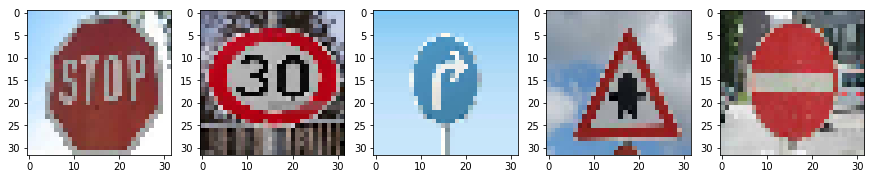

In [36]:
# Load in five German traffic sign I found from web. 
import matplotlib.image as mpimg
import cv2
X_new = []
for i in range(5):
    new_img = mpimg.imread("./examples/test" + str(i+1) + '.jpg')
    new_img = cv2.resize(new_img,(32,32),interpolation=cv2.INTER_CUBIC)
    X_new.append(new_img)
fig, axes = plt.subplots(1,5,figsize=(15,15))
for i in range(5):
    axes[i].imshow(X_new[i])
#     axes[i].set_title(signnames["SignName"][y_test[index]])
#     print(signnames["SignName"][y_test[index]])
print("Five German traffic signs found from the web.")

### Predict the Sign Type for Each Image

In [37]:
# Predict the above traffic signs.
X_new_nor = np.array(X_new) / 128 - 1
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./trained_models/'))
    prediction = predict(X_new_nor)
    print("Predict Result : ")
    print(signnames["SignName"][prediction])

INFO:tensorflow:Restoring parameters from ./trained_models/100epoch_dropout0.75
Predict Result : 
14                                     Stop
2                      Speed limit (50km/h)
33                         Turn right ahead
11    Right-of-way at the next intersection
17                                 No entry
Name: SignName, dtype: object


In [33]:
print("Compare the prediction result and the ground truth, the accuracy is 3/5")

Compare the prediction result and the ground truth, the accuracy is 3/5


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [38]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
def top_k_prob(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: batch_x})
    return top_k

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./trained_models/'))
    top_k = top_k_prob(X_new_nor)
    print("Predict Result : ", top_k)
    



INFO:tensorflow:Restoring parameters from ./trained_models/100epoch_dropout0.75
Predict Result :  TopKV2(values=array([[1.0000000e+00, 5.7214994e-10, 5.2200078e-10, 2.7991040e-10,
        1.2321914e-10],
       [1.0000000e+00, 3.2740668e-12, 2.0518951e-14, 5.9764914e-16,
        6.4572077e-21],
       [9.9999869e-01, 7.2582827e-07, 5.8747645e-07, 6.0462872e-12,
        2.1661830e-12],
       [1.0000000e+00, 1.4064274e-38, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32), indices=array([[14,  1, 13,  3,  2],
       [ 2, 31,  1,  0,  5],
       [33, 40, 35, 34, 38],
       [11, 27,  0,  1,  2],
       [17,  0,  1,  2,  3]], dtype=int32))


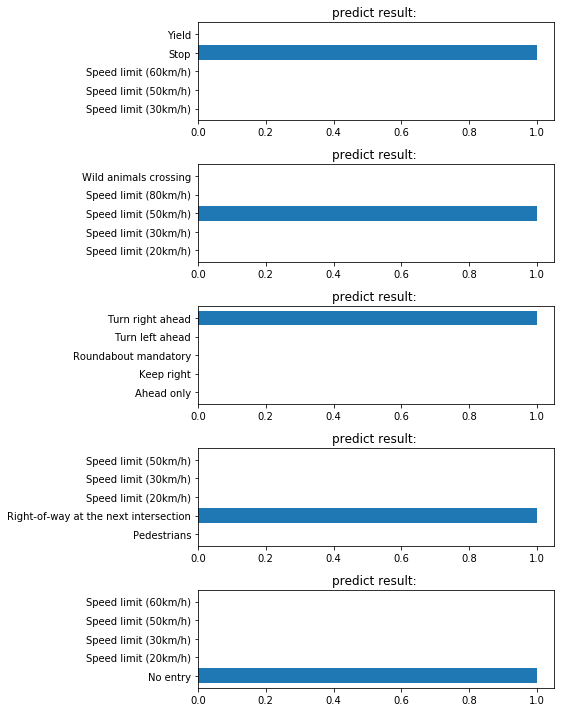

In [39]:
plt.figure(2, figsize=(8,10))
for i in range(5):
    # five most possible sign names of this image
    # top_k[0]: probabilities; top_k[1]: sign names
    sign_names = signnames["SignName"][top_k[1][i]]
    plt.subplot(5, 1, i+1)
    plt.tight_layout()
    plt.barh(sign_names, top_k[0][i])
    plt.title("predict result: ")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")